## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.


Una serie temporale è una sequenza di osservazioni prese in sequenza nel tempo. Nella modellazione descrittiva, o analisi delle serie temporali, una serie storica viene modellata per determinarne le componenti in termini di modelli stagionali, tendenze, relazioni con fattori esterni. Al contrario, la previsione delle serie temporali utilizza le informazioni in una serie temporale per prevedere i valori futuri di quella serie.

Lo scopo dell'analisi delle serie temporali è generalmente duplice: comprendere o modellare i meccanismi stocastici che danno origine a una serie osservata e/o prevedere i valori futuri di una serie sulla base della storia di quella serie. Una distinzione importante nella previsione è che il futuro diventa l'incognita e deve essere stimato dai dati già disponibili.

Per avere una predizione più accurata è importante inserire dati nuovi nel modello della time serie appena diventano disponibili. La predizione finale può essere anche pesantemente influenzata da eventi anomali accaduti negli ultimi anni es: Covid. più l'anomalia è recente più peserà sulle predizioni. in certi casi quindi potrebbe essere utile etendere l'orizzonte temporale dei dati forniti nel dataset per minimizzare l'impatto dell'anomalia sulle predizioni future.

le predizioni future tendono anche a perdere affidabilità nel medio e lungo termine, mentre sono più accurate nel breve termine

## Fake news Detection

In [126]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [127]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [128]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,Because 6 year old girls are consumed with the...,0
1,MEXICO CITY (Reuters) - Twelve people died and...,1
2,Randy Johnson 21st Century Wire MIRROR MIRROR...,0
3,PARIS (Reuters) - French counter-terrorism inv...,1
4,"Patton Oswalt is a comedian, but he s also ver...",0
...,...,...
44893,The State Department misplaced and lost some $...,0
44894,"WASHINGTON (Reuters) - Elon Musk, the chairman...",1
44895,"When the majority of students, regardless of c...",0
44896,HONOLULU/NEW YORK (Reuters) - Just hours befor...,1


In [129]:
patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

In [130]:
def clean_column_fake(df_fake, column, patterns):
    for pattern, replacement in patterns.items():
        df_fake[column] = df_fake[column].str.replace(pattern, replacement)
        df_fake[column] = df_fake[column].str.lower() # applica il lower
    return df_fake

In [131]:
def clean_column_true(df_true, column, patterns):
    for pattern, replacement in patterns.items():
        df_true[column] = df_true[column].str.replace(pattern, replacement)
        df_true[column] = df_true[column].str.lower() # applica il lower
    return df_true

In [132]:
clean_column(df, 'text', patterns)
clean_column_fake(df_fake, 'text', patterns)
clean_column_true(df_true, 'text', patterns)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head conservative repub...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel investi...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welcomed ...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,minsk reuters the shadow disused sovietera fac...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",1


In [133]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,because year old girls are consumed with their...,0
1,mexico city reuters twelve people died and wer...,1
2,randy johnson century wire mirror mirror still...,0
3,paris reuters french counterterrorism investig...,1
4,patton oswalt comedian but also very seriously...,0
...,...,...
44893,the state department misplaced and lost some b...,0
44894,washington reuters elon musk the chairman and ...,1
44895,when the majority students regardless color ac...,0
44896,honolulunew york reuters just hours before pre...,1


In [134]:
df_fake = clean_column_fake(df_fake, 'text', patterns)
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn wish all americans ha...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,friday was revealed that former milwaukee she...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced that wou...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,century wire says wire reported earlier this ...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,century wire says familiar theme whenever the...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen century wireremember when t...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,century wire says jazeera america will down h...,Middle-east,"January 14, 2016",0


In [135]:
df_true=clean_column_true(df_true,'text',patterns)

In [136]:
df.info()
df_fake.info()
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 n

In [137]:
df.dropna() 
df_fake.dropna()
df_true.dropna() 


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head conservative repub...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel investi...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welcomed ...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,minsk reuters the shadow disused sovietera fac...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",1


In [138]:
df['text'][0]
df_fake['text'][0]
df_true['text'][0]


'washington reuters the head conservative republican faction the congress who voted this month for huge expansion the national debt pay for tax cuts called himself fiscal conservative sunday and urged budget restraint keeping with sharp pivot under way among republicans representative mark meadows speaking cbs face the nation drew hard line federal spending which lawmakers are bracing battle over january when they return from the holidays wednesday lawmakers will begin trying pass federal budget fight likely linked other issues such immigration policy even the november congressional election campaigns approach which republicans will seek keep control congress president donald trump and his republicans want big budget increase military spending while democrats also want proportional increases for nondefense discretionary spending programs that support education scientific research infrastructure public health and environmental protection the trump administration has already been willing

In [139]:
text = list(map(str, df['text']))
text = ''.join(text)

In [140]:
text_fake = list(map(str, df_fake['text']))
text_fake = ''.join(text)

In [141]:
text_true = list(map(str, df_true['text']))
text_true = ''.join(text)

(-0.5, 799.5, 399.5, -0.5)

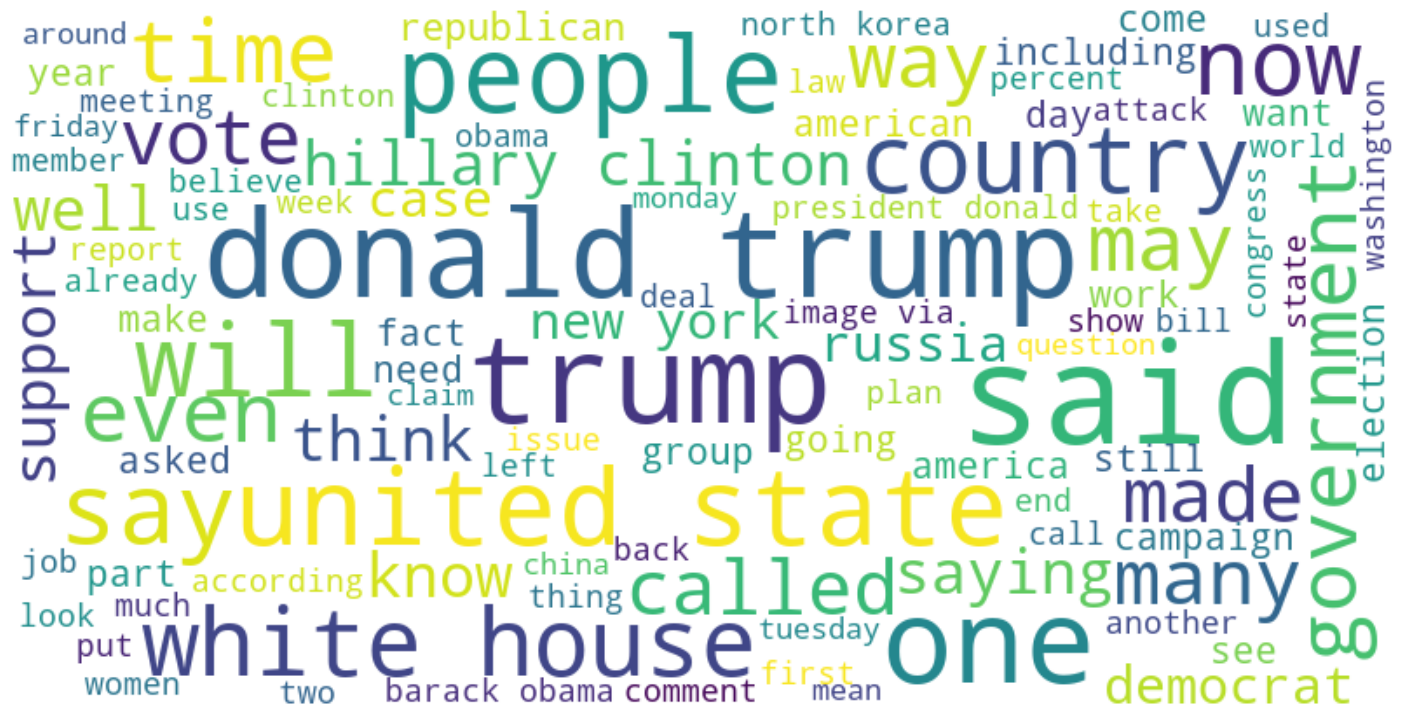

In [142]:
## STEP 2 : EDA con WORDCLOUD sul database totale
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 100, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

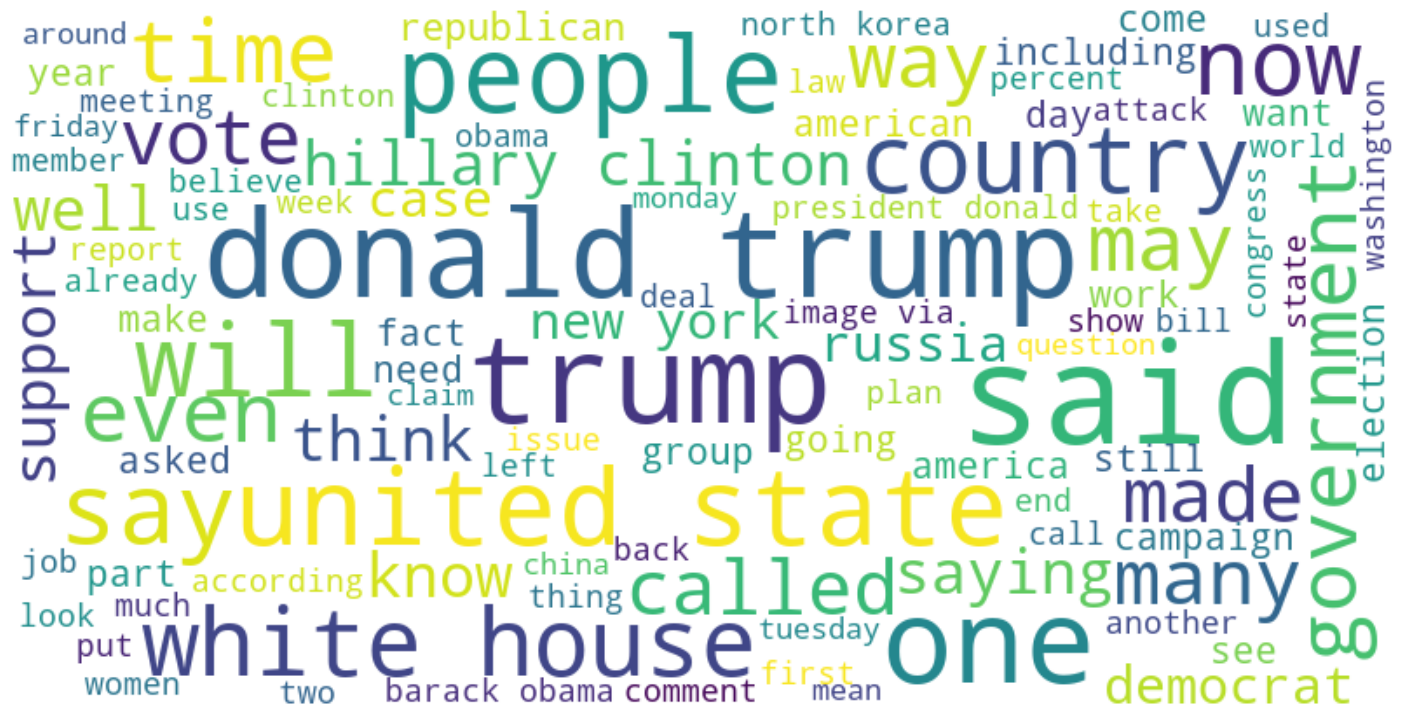

In [143]:
## STEP 2 : EDA con WORDCLOUD sul database fake
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 100, contour_width = 3,
                      max_font_size = 80, contour_color = 'red',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_fake)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

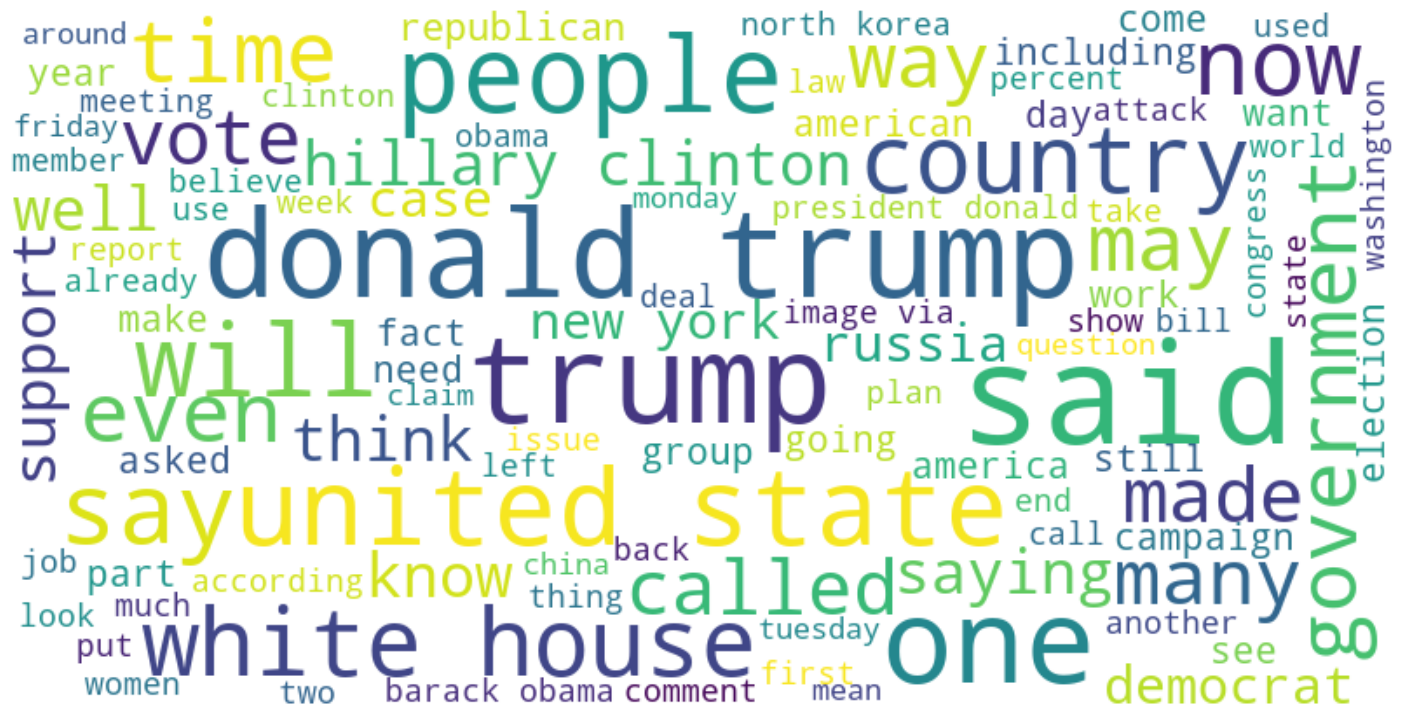

In [144]:
## STEP 2 : EDA con WORDCLOUD sul database true
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 100, contour_width = 3,
                      max_font_size = 80, contour_color = 'green',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_true)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

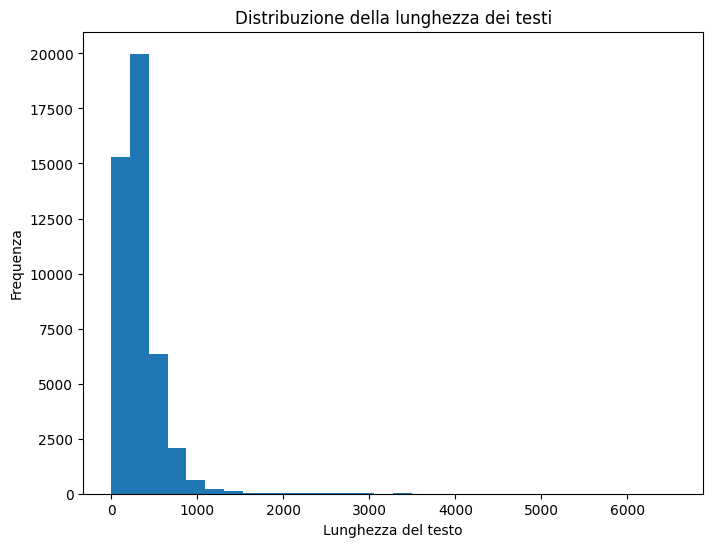

In [145]:
# Calcolo della lunghezza dei testi database tot
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Visualizzazione dell'istogramma della lunghezza dei testi
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=30)
plt.title('Distribuzione della lunghezza dei testi')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Frequenza')
plt.show()

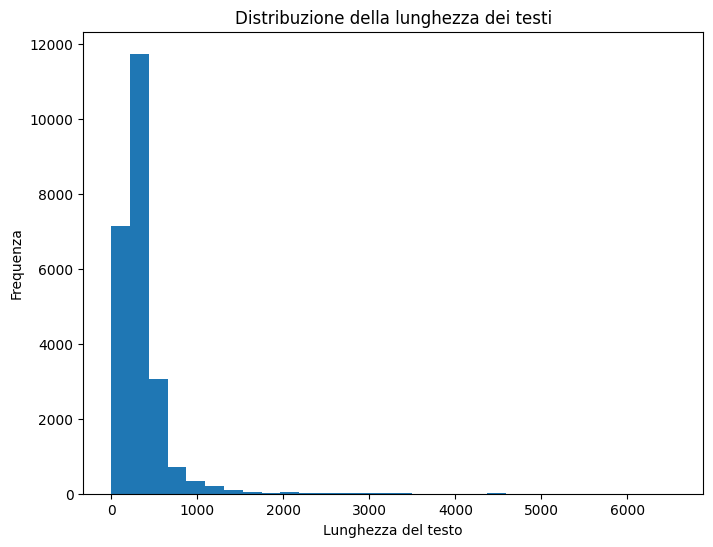

In [146]:
# Calcolo della lunghezza dei testi
df_fake['text_length'] = df_fake['text'].apply(lambda x: len(x.split()))

# Visualizzazione dell'istogramma della lunghezza dei testi
plt.figure(figsize=(8, 6))
plt.hist(df_fake['text_length'], bins=30)
plt.title('Distribuzione della lunghezza dei testi')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Frequenza')
plt.show()

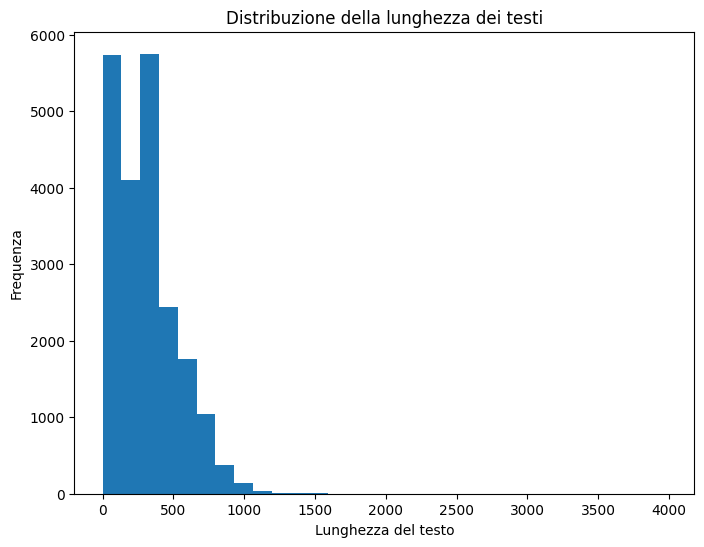

In [147]:
# Calcolo della lunghezza dei testi
df_true['text_length'] = df_true['text'].apply(lambda x: len(x.split()))

# Visualizzazione dell'istogramma della lunghezza dei testi
plt.figure(figsize=(8, 6))
plt.hist(df_true['text_length'], bins=30)
plt.title('Distribuzione della lunghezza dei testi')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Frequenza')
plt.show()

dall'analisi della lunghezza dei testi possiamo vedere che i testi positivi sono seguono una distribuzione bilineare e sono in media più corti di  quelli fake

In [148]:
X_tot = df['text']
y_tot = df['class']

In [149]:
##STEP 4: Vettorizzazione database tot
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect_tot = vectorizer.fit_transform(X_tot).toarray()
X_vect_tot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 9, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [150]:
##STEP 5: TF-IDF database tot
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf_tot = tfidfconverter.fit_transform(X_vect_tot).toarray()
X_tfidf_tot

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11237111, 0.        ,
        0.01863551],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05707521, 0.        ,
        0.08518766],
       [0.        , 0.03469313, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [151]:
##STEP 6: Split Training and Test database tot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_tot, y_tot,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [152]:
#step 7 modellazione
from sklearn.metrics import accuracy_score

In [153]:
#decisiontree class
# build Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)
# accuracy score on the test data
y_pred = dt_clf.predict(X_test)
test_data_accuracy_dec_tree = accuracy_score(y_pred, y_test)
test_data_accuracy_dec_tree

0.9946547884187082

In [154]:
#random forest class
#build randomforest class
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)
# accuracy score on the test data
y_pred = rf_clf.predict(X_test)
test_data_accuracy_rforest = accuracy_score(y_pred, y_test)
test_data_accuracy_rforest

0.9976243504083148

In [155]:
#build naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy_nb = accuracy_score(y_pred, y_test)
test_data_accuracy_nb


0.9319970304380104

ho usato naive bayes perchè altrimenti mi overfittava i dati con random forest

In [156]:
labels = ['Fake news', 'true news']

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

   Fake news       0.94      0.93      0.93      7004
   true news       0.93      0.93      0.93      6466

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

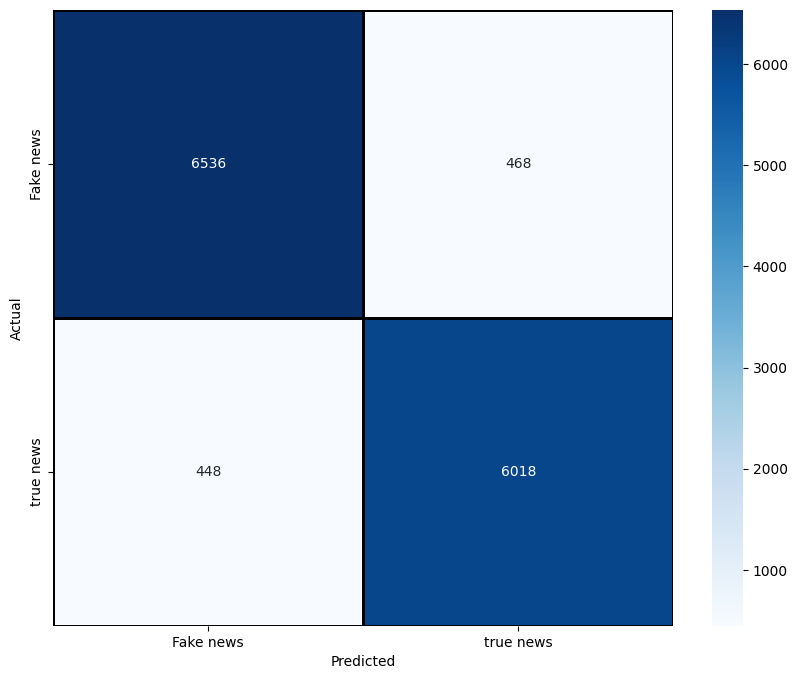

In [157]:
labels = ['Fake news', 'true news']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [158]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.9570155902004455

In [159]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw testuali)
X_train, X_test, y_train, y_test = train_test_split(X_tot, y_tot,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.977728285077951


In [160]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

   Fake news       0.98      0.97      0.98      7004
   true news       0.97      0.98      0.98      6466

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



 leggermente sospetti questi valori ma ho finito il tempo, andrebbe re-run il test modificando le features o il classifier o entrambe

Text(95.72222222222221, 0.5, 'Actual')

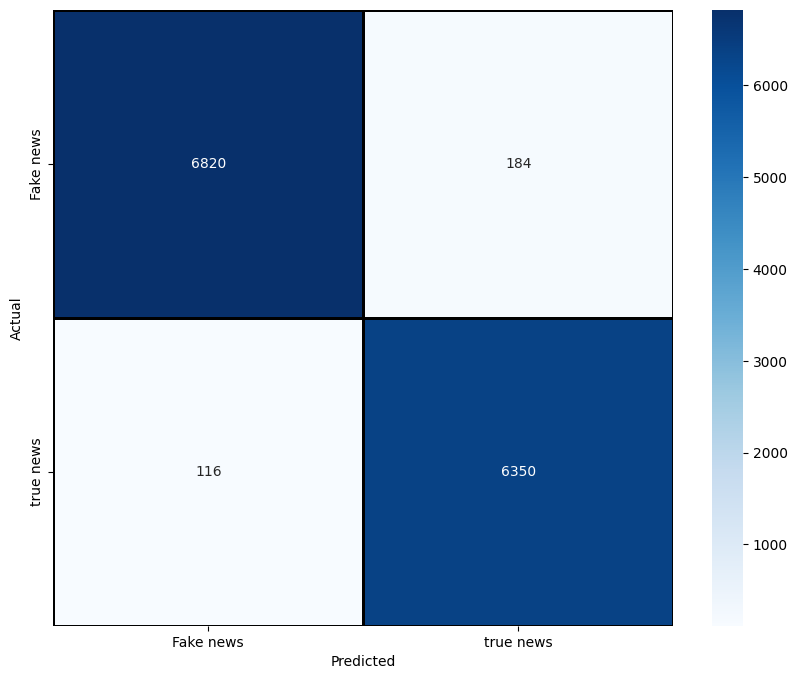

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [162]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_tot, y_tot, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.9771958  0.97701764 0.97861725 0.97647897 0.97843906 0.97505346
 0.97879544 0.97754811]
mean=0.9773932151320139
std=0.0011764676983895522


In [163]:
import joblib
joblib.dump(pipe,'fakenews.pkl')

['fakenews.pkl']

In [164]:
import joblib

uploaded_model = joblib.load('fakenews.pkl')
pred = uploaded_model.predict(['trump is beautiful']) 
pred[0]


0